In [1]:
import numpy as np
import numpy.random as npr

from scipy.special import gammaln

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

import seaborn as sns
color_names = ["windows blue",
               "red",
               "amber",
               "faded green"]
colors = sns.xkcd_palette(color_names)
sns.set_style("white")

# Figure 2: Same as Figure 1 but with real proposal
Here we use 

$h(\epsilon, \alpha) = (\alpha - \frac{1}{3}) ( 1 + \frac{\epsilon}{\sqrt{9\alpha - 3}})^3$

for $\epsilon \sim N(0,1)$.

We have,

$\frac{\partial h}{\partial \epsilon} = (\alpha - \frac{1}{3}) \frac{3}{\sqrt{9\alpha - 3}}(1+\frac{\epsilon}{\sqrt{9\alpha - 3}})^2 $

The proposal density is 

$ r(z \mid \alpha) = \left| \frac{d h^{-1}(z, \alpha)}{dz} \right| N(h^{-1}(z, \alpha) \mid 0, 1)$

$ r(h(\epsilon, \alpha)) = \left| \frac{d h(\epsilon, \alpha)}{d\epsilon} \right|^{-1} N(\epsilon \mid 0, 1)$


In [2]:
epsilon = np.linspace(-6,6,1000)
a = 2.0

normal = lambda e: 1./np.sqrt(2*np.pi) * np.exp(-0.5 * e**2)
h = lambda e, a: (a - 1./3.) * (1 + e/np.sqrt(9*a-3))**3
dh = lambda e, a: (a - 1./3) * 3./np.sqrt(9*a - 3.) * (1+e/np.sqrt(9*a-3))**2

# Proposal density
r = lambda e, a: abs(dh(e,a))**(-1) * normal(e)

# Gamma density
p = lambda x, a: (x > 0 ) * np.nan_to_num(1./np.exp(gammaln(a)) * x**(a-1) * np.exp(-x))

# Find the scale factor to ensure Mr > p
M = np.max(p(h(epsilon, a), a) / r(epsilon, a))

print("Acceptance probability: {}".format(1./M))

Acceptance probability: 0.981659961302


(-0.2760733796800342, 27.609406713013374)

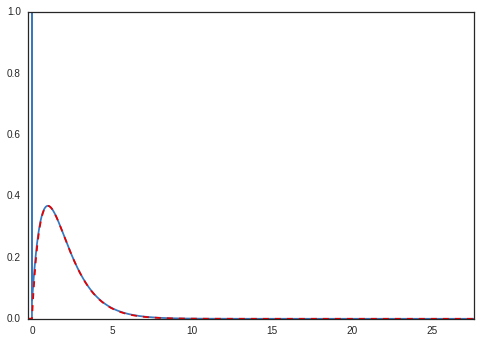

In [3]:
# plt.plot(epsilon, normal(epsilon))
plt.plot(h(epsilon, a), M*r(epsilon, a), c=colors[0])
plt.plot(h(epsilon, a), p(h(epsilon, a), a), c=colors[1], ls='--')
plt.ylim(0,1)
plt.xlim(np.min(h(epsilon, a)), np.max(h(epsilon, a)))

(-6.0, 6.0)

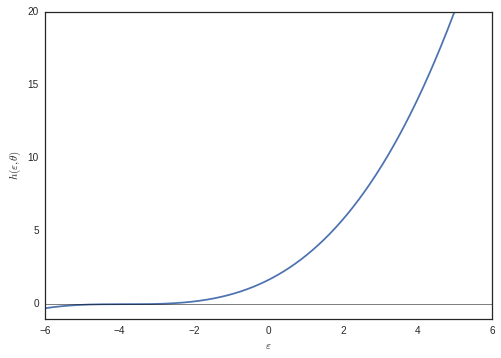

In [4]:
plt.plot(epsilon, h(epsilon, a))
plt.plot(epsilon, np.zeros_like(epsilon), '-k', lw=0.5)
plt.xlabel("$\\varepsilon$")
plt.ylabel("$h(\\varepsilon, \\theta)$")
plt.ylim(-1,20)
plt.xlim(np.min(epsilon),np.max(epsilon))

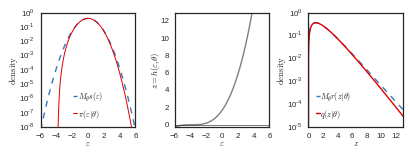

In [6]:
# Now put it all together... Show:
# - s(epsilon), the density of the reparameterized proposal
# - pi(epsilon), the density of accepted values of epsilon
# - h(epsilon), the parameterized transformation maps epsilon to z
# - q(z) = p(h(epsilon)); epsilon ~ pi(epsilon)
# - r(z) = p(h(epsilon)); epsilon ~ s(epsilon)
a = 2.
epsilon = np.linspace(-6,6,1000)

pi = lambda e: normal(e) * p(h(epsilon, a), a) / r(epsilon, a)

sns.set_context("paper")
fig = plt.figure(figsize=(6.5, 2.05))
gs = gridspec.GridSpec(1, 11)

# s(epsilon) and pi(epsilon)
ax1 = fig.add_subplot(gs[:3])
plt.semilogy(epsilon, M * normal(epsilon), '--', color=colors[0], label="$M_{\\theta} s(\\varepsilon)$")
plt.semilogy(epsilon, pi(epsilon), '-', lw=1, color=colors[1], label="$\pi(\\varepsilon | \\theta)$")
plt.legend(handlelength=0.5, fontsize=8, handletextpad=0.1,
           loc="lower center")
plt.xlabel("$\\varepsilon$", labelpad=-1)
plt.ylabel("$\mathrm{density}$", labelpad=-1)
plt.ylim(1e-8,1.)

# h(epsilon)
ax2 = fig.add_subplot(gs[4:7])
plt.plot(epsilon, h(epsilon, a), '-', color='gray')
plt.xlabel("$\\varepsilon$", labelpad=-1)
plt.plot(epsilon, np.zeros_like(epsilon), '-k', lw=0.5)
plt.ylabel("$z=h(\\varepsilon, \\theta)$", labelpad=-1)
plt.ylim(h(epsilon[0], a), 13.)

# q(z) and r(z)
ax1 = fig.add_subplot(gs[8:])
plt.semilogy(h(epsilon, a), M*r(epsilon, a),'--', color=colors[0], label="$M_{\\theta} r(z | \\theta)$")
plt.semilogy(h(epsilon, a), p(h(epsilon, a), a), color=colors[1], ls="-", label="$q(z | \\theta)$")
plt.legend(handlelength=0.5, fontsize=8, handletextpad=0.1, 
           loc="lower left")
plt.xlabel("$z$", labelpad=-1)
plt.ylabel("$\mathrm{density}$", labelpad=-1)
plt.xlim(0, 13)
plt.ylim(1e-5, 1.)


plt.savefig("figure2.png", dpi=150)
plt.savefig("figure2.pdf")
